In [20]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их).

<img src="../data/confusion_mushrooms.png">


In [7]:
pred = pd.read_csv('../data/tmp', index_col=0)
y_true = pd.read_csv('../data/testing_y_mush.csv')

In [10]:
pred.head()

,0
0,0
1,0
2,1
3,1
4,1


In [11]:
y_true.head()

,class
0,0
1,0
2,1
3,1
4,1


In [15]:
c_matr = confusion_matrix(y_true, pred)
c_matr

array([[1055,    0],
       [   0,  976]], dtype=int64)

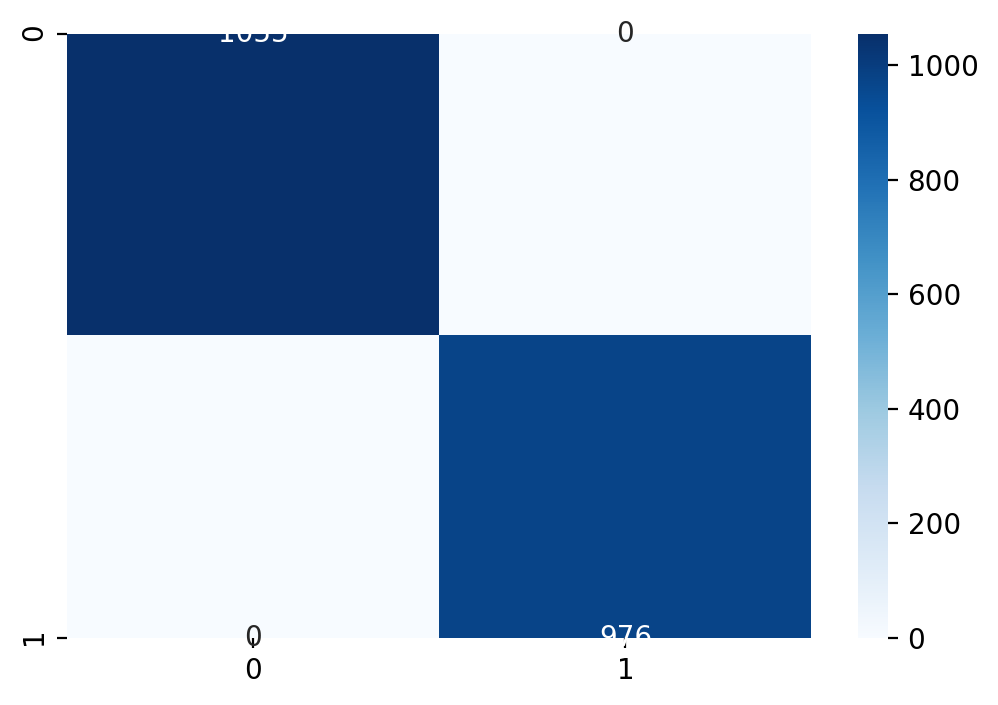

In [32]:
plt.figure(dpi=200)
sns.heatmap(c_matr,
            annot=True,
            cmap="Blues",
            fmt="d"
           )


---
---


Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.



# <center> ¯\_(ツ)_/¯


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
data = pd.read_csv('../data/invasion.csv')
data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [66]:
X_train = data.loc[:, data.columns != "class"]
y_train = data["class"]
X_train.shape

(500, 6)

In [48]:
y_train.head(10)

0    transport
1    transport
2    transport
3      fighter
4      fighter
5      cruiser
6    transport
7      fighter
8    transport
9    transport
Name: class, dtype: object

In [67]:
some_map = {"transport": 0, "fighter": 1, "cruiser": 2}
y_train = y_train.map(some_map)

In [68]:
data = pd.read_csv("../data/operative_information.csv")
data.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [69]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train, y_train)
predict = clf.predict(data)

In [72]:
mapper = {0: "transport", 1: "fighter", 2: "cruiser"}

In [85]:
pred = pd.DataFrame(predict)[0].map(mapper)
pred.head()

0      fighter
1    transport
2    transport
3    transport
4      fighter
Name: 0, dtype: object

In [90]:
res = pred.value_counts()
res

fighter      675
transport    595
cruiser      230
Name: 0, dtype: int64

---
### Какая переменная оказалась самой важной для классифицирования кораблей?



In [99]:
ans = sorted(list(zip(clf.feature_importances_, X_train.columns)), reverse=True)
ans

[(0.29757249328845636, 'volume'),
 (0.28935814847531643, 'brightness'),
 (0.2460982714854259, 'g_reflection'),
 (0.09317337210189407, 'speed'),
 (0.07361269769210331, 'i_reflection'),
 (0.00018501695680409118, 'time_of_observance')]

In [100]:
ans[0][1]

'volume'

---
---
# <center> ¯\_(ツ)_/¯
Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [101]:
data = pd.read_csv("../data/space_can_be_a_dangerous_place.csv")
data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [106]:
some = data.corr()
some["dangerous"].sort_values(ascending=False)

dangerous                    1.000000
buggers_were_noticed         0.344469
nearby_system_has_planemo    0.299508
black_hole_is_near           0.052968
peradventure_index           0.005788
r                            0.005788
phi                          0.003035
dustiness                   -0.000499
Name: dangerous, dtype: float64

In [107]:
X_train = data.loc[:, data.columns != "dangerous"]
y_train = data.dangerous

In [110]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

D:\Anaconda3\envs\py36_R\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
sorted(list(zip(clf.feature_importances_, data.columns)), reverse=True)

[(0.2380747685341415, 'dustiness'),
 (0.18634303810147626, 'peradventure_index'),
 (0.18486066496693096, 'r'),
 (0.1756304940925229, 'phi'),
 (0.11963928906113849, 'buggers_were_noticed'),
 (0.09152641395364719, 'nearby_system_has_planemo'),
 (0.003925331290142762, 'black_hole_is_near')]